Loaded 845 images with shape (224, 224, 3)
Loaded 845 labels with shape 11


c:\Users\sathw\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2505 - loss: 2.4055 - val_accuracy: 0.4083 - val_loss: 1.8136
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 846ms/step - accuracy: 0.3918 - loss: 1.8835 - val_accuracy: 0.4083 - val_loss: 1.7354
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 844ms/step - accuracy: 0.3883 - loss: 1.8150 - val_accuracy: 0.4142 - val_loss: 1.7156
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 856ms/step - accuracy: 0.3772 - loss: 1.8000 - val_accuracy: 0.4142 - val_loss: 1.6975
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 831ms/step - accuracy: 0.3977 - loss: 1.7235 - val_accuracy: 0.4734 - val_loss: 1.6160
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 843ms/step - accuracy: 0.4406 - loss: 1.6056 - val_accuracy: 0.4734 - val_loss: 1.5755
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 857ms/step - accuracy: 0.5063 - loss: 1.4665 - val_accuracy: 0.5266 - val_loss: 1.5301
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 844ms/step - accuracy: 0.5527 - loss: 1.3573 - val_accurac

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.5290 - loss: 2.4109
Validation Accuracy: 0.54


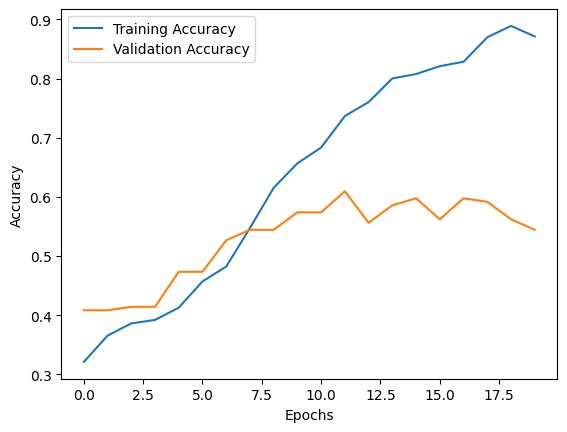

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step


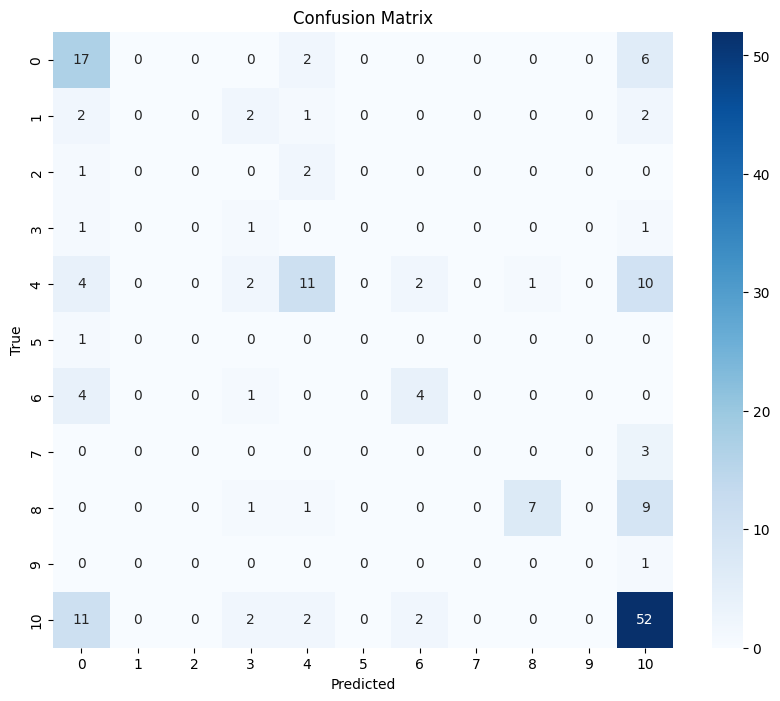

              precision    recall  f1-score   support

           0       0.41      0.68      0.52        25
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.11      0.33      0.17         3
           4       0.58      0.37      0.45        30
           5       0.00      0.00      0.00         1
           6       0.50      0.44      0.47         9
           7       0.00      0.00      0.00         3
           8       0.88      0.39      0.54        18
           9       0.00      0.00      0.00         1
          10       0.62      0.75      0.68        69

    accuracy                           0.54       169
   macro avg       0.28      0.27      0.26       169
weighted avg       0.54      0.54      0.52       169



c:\Users\sathw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sathw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sathw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Loading the data
images = np.load('images.npy')
labels = np.load('labels.npy')

print(f'Loaded {images.shape[0]} images with shape {images.shape[1:]}')
print(f'Loaded {labels.shape[0]} labels with shape {labels.shape[1]}')

# Defining model
model = Sequential()

# Adding convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten & fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(labels.shape[1], activation='softmax'))  # Output layer with softmax for multi-class classification

# Compiling our model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split dataset into training & validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Saving our trained model
model.save('landmark_recognition_model.h5')

# Evaluating
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Plotting training history (won't run in terminal)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))

Loaded 845 images with shape (224, 224, 3)
Loaded 845 labels with shape 11
Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.3357 - loss: 2.5028 - val_accuracy: 0.0059 - val_loss: 3.2017
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.6797 - loss: 1.0146 - val_accuracy: 0.0355 - val_loss: 2.9355
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 92s 4s/step - accuracy: 0.8774 - loss: 0.5016 - val_accuracy: 0.0414 - val_loss: 2.8352
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.9253 - loss: 0.2980 - val_accuracy: 0.0296 - val_loss: 2.7612
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.9762 - loss: 0.1702 - val_accuracy: 0.0118 - val_loss: 3.0348
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.9968 - loss: 0.0857 - val_accuracy: 0.0237 - val_loss: 3.0453
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.9977 - loss: 0.0633 - val_accuracy: 0.0651 - val_loss: 3.0371
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 

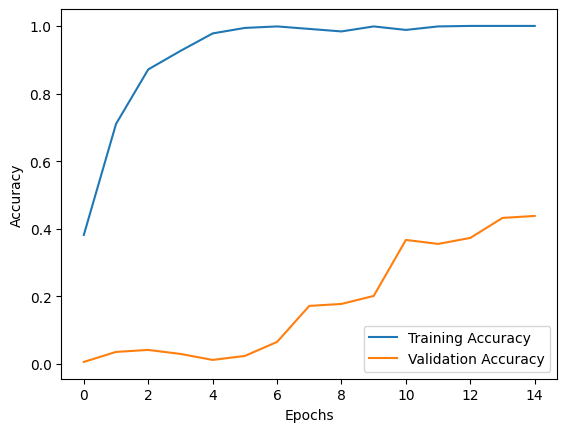

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


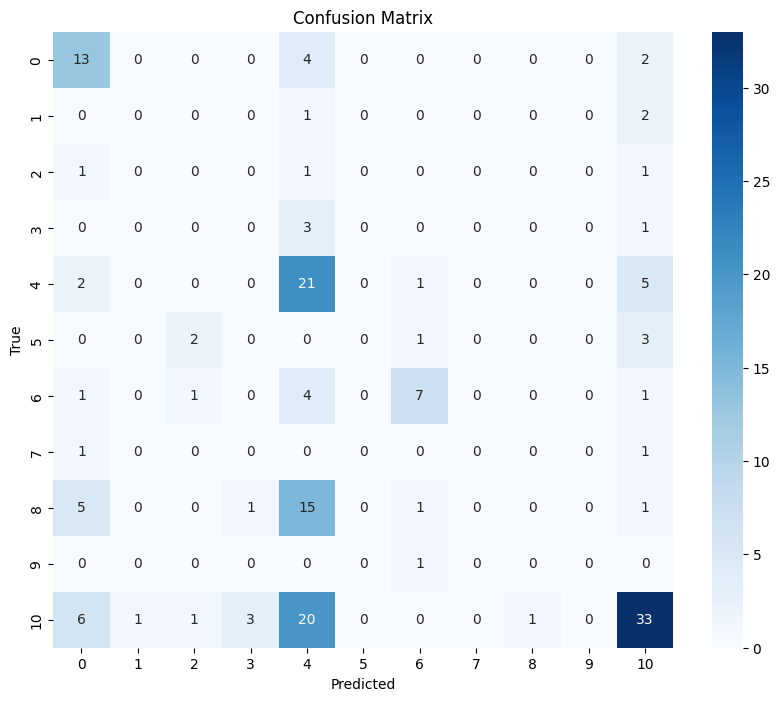

              precision    recall  f1-score   support

           0       0.45      0.68      0.54        19
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.30      0.72      0.43        29
           5       0.00      0.00      0.00         6
           6       0.64      0.50      0.56        14
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         1
          10       0.66      0.51      0.57        65

    accuracy                           0.44       169
   macro avg       0.19      0.22      0.19       169
weighted avg       0.41      0.44      0.40       169



/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/ML_3/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
images = np.load('images.npy')
labels = np.load('labels.npy')

print(f'Loaded {images.shape[0]} images with shape {images.shape[1:]}')
print(f'Loaded {labels.shape[0]} labels with shape {labels.shape[1]}')

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load ResNet50 with pre-trained weights from ImageNet
# We don't include the top layer, as we want to add our custom classifier layer for landmark recognition
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adding custom layers on top of ResNet50
# First, we flatten the output from ResNet50, then add a Dense layer with 128 units
# Finally, we add the output layer with units equal to the number of classes and 'softmax' activation
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(labels.shape[1], activation='softmax')(x)

# Creating the new model that consists of the pre-trained ResNet50 and the custom layers
model = Model(inputs=base_model.input, outputs=output)

# Unfreezing some of the deeper layers to fine-tune the model for our specific dataset
# We'll leave the first few layers frozen and only train the latter half
# This will allow the model to adapt better to the specific features of the landmark dataset
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False
for layer in base_model.layers[100:]:  # Unfreeze the remaining layers
    layer.trainable = True

# Compiling the model
# Using Adam optimizer with a lower learning rate of 0.00001 to ensure that the changes made during fine-tuning are gradual
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
# We train for 15 epochs now since we are fine-tuning some layers, which will require more iterations to adjust properly
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32)

# Save the new model
#model.save('landmark_recognition_resnet50_finetuned.h5')

# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Plotting the training history to visualize how the training and validation accuracy evolve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predicting the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes))